In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-catsvsdogs-dataset/readme[1].txt
/kaggle/input/microsoft-catsvsdogs-dataset/MSR-LA - 3467.docx
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6234.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1269.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3863.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6241.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10304.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/623.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2193.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11925.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3750.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11378.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2008.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10730.jpg
/kaggle/input/micros

Step 1: Import Required Libraries

In [26]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# 📁 Step 2: Load and Preprocess Images
def load_images_from_folder(folder, label, size=(64, 64), limit=None):
    data = []
    count = 0
    for filename in tqdm(os.listdir(folder)):
        if filename.startswith('cat') and label == 0 or filename.startswith('dog') and label == 1:
            if limit and count >= limit:
                break
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, size)
                data.append((img.flatten(), label))
                count += 1
    return data

Step 3: Load Data

In [36]:
cat_data = load_images_from_folder('/kaggle/input/dogs-vs-cats/train/cats', label=0, limit=1000)
dog_data = load_images_from_folder('/kaggle/input/dogs-vs-cats/train/dogs', label=1, limit=1000)


data = cat_data + dog_data
X,y = zip(*data)
X = np.array(X)
y = np.array(y)


# 🔀 Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Step 5: Train the SVM Model
model = SVC(kernel='linear')  # you can also try 'rbf'
model.fit(X_train, y_train)

 10%|█         | 1000/10000 [00:06<00:55, 163.08it/s]


SVC(kernel='linear')

Step 4: Train the SVM Model

In [37]:
model = SVC(kernel='linear')  # You can try 'rbf' or 'poly' too
model.fit(X_train, y_train)

SVC(kernel='linear')

Step 5: Evaluate the Model

In [38]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.55

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.67      0.60       199
           1       0.57      0.43      0.49       201

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.54       400
weighted avg       0.55      0.55      0.54       400



Step 6: Visualize Predictions

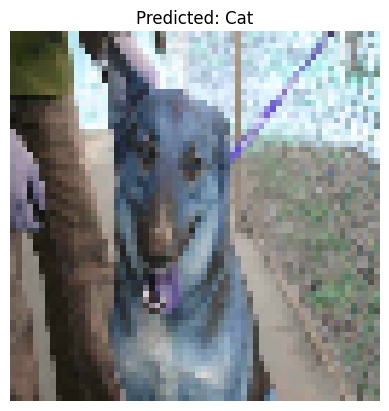

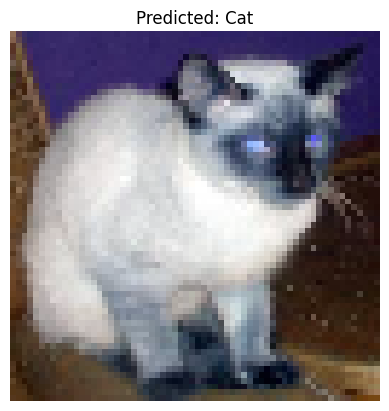

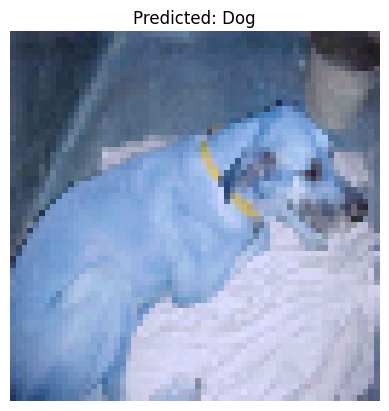

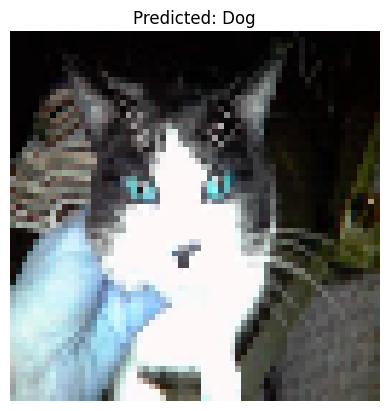

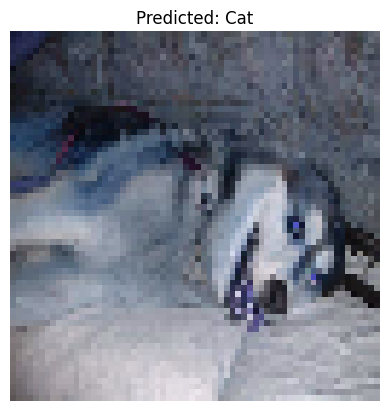

In [40]:
for i in range(5):
    img = X_test[i].reshape(64, 64, 3)
    plt.imshow(img.astype('uint8'))
    plt.title(f"Predicted: {'Dog' if y_pred[i]==1 else 'Cat'}")
    plt.axis('off')
    plt.show()